<a href="https://www.kaggle.com/code/parisammm/improving-kmeans-clustering?scriptVersionId=159579385" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clusters-data/cluster_2.csv
/kaggle/input/clusters-data/cluster_3.csv
/kaggle/input/clusters-data/cluster_0.csv
/kaggle/input/clusters-data/cluster_1.csv
/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv


In [2]:
data = pd.read_csv('/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv')
data.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
0,0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT
4,4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


***> Named Entity Recognition using Spacy***

In [3]:
# command to run before code
! pip install spacy
! python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
#using spacy
 
# imports and load spacy english language package
import spacy
from spacy import displacy
from spacy import tokenizer
nlp = spacy.load('en_core_web_sm')
 
#Load the text and process it
# I copied the text from python wiki
text =(data['comment_body'][6])
# text2 = # copy the paragraphs from  https://www.python.org/doc/essays/
doc = nlp(text)
#doc2 = nlp(text2)
sentences = list(doc.sents)
#print(sentences)
# tokenization
#for token in doc:
    #print(token.text)
# print entities
ents = [e.label_ for e in doc.ents]
print(ents)
# now we use displaycy function on doc2
#displacy.render(doc, style='ent', jupyter=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

['NORP', 'ORG', 'PERSON', 'NORP', 'NORP', 'NORP']


In [5]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
print(len(comments))
entities0 = []
for comment in comments:
    doc = nlp(comment)
    entities0.append([e.label_ for e in doc.ents])
print(entities0)

500
[[], [], ['PERSON'], [], ['GPE'], [], [], ['NORP'], ['CARDINAL'], [], [], [], ['DATE'], [], ['CARDINAL'], [], [], [], [], [], ['DATE'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['CARDINAL'], [], [], [], [], [], [], ['DATE'], [], ['NORP'], [], ['PERSON'], ['ORG'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['ORG'], [], [], [], [], ['DATE'], ['PERSON'], ['DATE'], [], ['CARDINAL', 'GPE', 'DATE'], [], [], [], [], [], ['CARDINAL'], [], ['PERSON'], [], ['ORG'], [], ['PERSON'], [], ['CARDINAL'], [], [], [], [], ['DATE'], [], [], [], [], ['ORG'], [], [], ['CARDINAL'], [], ['CARDINAL', 'DATE'], ['CARDINAL'], [], [], [], ['DATE', 'CARDINAL'], [], [], [], [], [], [], [], [], [], [], ['ORDINAL'], [], [], [], ['DATE'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['DATE'], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], ['CARDINAL'], [], [], [], [], [], [], [], ['CARDINAL'], [], [], [], [], [], ['ORDINAL'

In [6]:
from collections import Counter
entities_set = set()
entities_list0 = [item for row in entities0 for item in row]
#print(entities_list)
entities_set.update(entities_list0)
print(entities_set)
dict_c0 = dict(Counter(entities_list0))

{'PERSON', 'GPE', 'PERCENT', 'TIME', 'ORG', 'LANGUAGE', 'ORDINAL', 'NORP', 'DATE', 'CARDINAL'}


In [7]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
print(len(comments))
entities1 = []
for comment in comments:
    doc = nlp(comment)
    entities1.append([e.label_ for e in doc.ents])
print(entities1)

500
[[], [], [], ['CARDINAL', 'ORG'], [], ['ORG', 'CARDINAL'], [], ['CARDINAL', 'CARDINAL'], [], ['DATE', 'CARDINAL', 'CARDINAL', 'ORG'], ['CARDINAL'], [], [], ['CARDINAL'], [], [], [], [], ['CARDINAL'], [], ['ORDINAL'], [], [], [], ['PERSON'], [], ['DATE', 'PERSON'], [], [], ['DATE', 'DATE', 'CARDINAL', 'CARDINAL', 'ORDINAL', 'ORG'], ['TIME', 'ORG', 'DATE'], ['GPE', 'GPE', 'GPE'], ['CARDINAL', 'NORP', 'CARDINAL', 'CARDINAL', 'CARDINAL'], ['CARDINAL', 'DATE'], [], ['ORG', 'ORG'], ['ORG', 'CARDINAL', 'DATE'], [], [], ['CARDINAL'], ['DATE', 'GPE'], [], ['ORG'], [], [], ['PRODUCT'], [], [], ['PERSON'], [], [], [], [], [], [], [], [], ['DATE'], ['ORDINAL'], ['CARDINAL'], ['DATE', 'CARDINAL'], [], ['DATE', 'GPE', 'PERSON', 'GPE', 'DATE', 'NORP'], ['CARDINAL'], [], ['CARDINAL'], [], [], [], [], ['DATE'], ['CARDINAL'], ['ORDINAL', 'CARDINAL', 'CARDINAL'], [], [], ['ORG', 'ORG', 'ORG'], ['ORG', 'DATE'], ['NORP'], ['ORDINAL'], ['NORP'], ['CARDINAL'], [], ['DATE'], ['PERSON', 'CARDINAL', 'LANGUA

In [8]:
entities_list1 = [item for row in entities1 for item in row]
#print(entities_list)
entities_set.update(entities_list1)
print(entities_set)
dict_c1 = dict(Counter(entities_list1))

{'PERSON', 'GPE', 'PERCENT', 'TIME', 'MONEY', 'ORG', 'LANGUAGE', 'ORDINAL', 'LOC', 'NORP', 'DATE', 'PRODUCT', 'QUANTITY', 'CARDINAL', 'WORK_OF_ART'}


In [9]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
print(len(comments))
entities2 = []
for comment in comments:
    doc = nlp(comment)
    entities2.append([e.label_ for e in doc.ents])
print(entities2)

500
[[], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], ['CARDINAL'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['GPE'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], ['PERSON'], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], ['PERSON'], [], [], ['ORG'], [], [], ['GPE'], [], [], [], [], [], [], [], [], [], ['GPE'], [], [], [], ['ORG'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['ORG'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], ['ORG'], [], [], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

In [10]:
entities_list2 = [item for row in entities2 for item in row]
#print(entities_list)
entities_set.update(entities_list2)
print(entities_set)
dict_c2 = dict(Counter(entities_list2))

{'PERSON', 'GPE', 'PERCENT', 'TIME', 'MONEY', 'ORG', 'LANGUAGE', 'ORDINAL', 'LOC', 'NORP', 'DATE', 'PRODUCT', 'QUANTITY', 'CARDINAL', 'WORK_OF_ART'}


In [11]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
print(len(comments))
entities3 = []
for comment in comments:
    doc = nlp(comment)
    entities3.append([e.label_ for e in doc.ents])
print(entities3)

500
[['CARDINAL', 'DATE'], [], [], [], [], [], [], ['PERSON', 'ORDINAL'], [], ['DATE'], [], [], [], [], [], [], [], [], [], [], ['GPE'], [], ['CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL'], ['ORG'], [], ['ORG'], [], [], [], [], [], ['LOC'], [], ['PERSON'], ['ORG'], [], ['CARDINAL', 'CARDINAL', 'ORG', 'CARDINAL'], [], ['PERSON', 'TIME', 'GPE'], ['CARDINAL', 'ORG'], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], ['ORG'], [], ['DATE'], ['ORG', 'DATE'], [], [], [], ['ORG', 'DATE', 'ORG', 'DATE'], [], ['CARDINAL'], ['ORG', 'CARDINAL', 'ORG'], [], [], [], [], ['CARDINAL', 'CARDINAL'], ['DATE', 'CARDINAL', 'DATE', 'ORG', 'CARDINAL', 'PERSON'], [], ['PERSON'], [], ['ORG', 'CARDINAL'], [], [], [], [], [], ['CARDINAL'], ['CARDINAL', 'PERSON'], [], [], [], [], ['TIME'], ['CARDINAL'], ['PERSON'], ['CARDINAL'], [], [], [], [], [], [], ['ORG'], ['CARDINAL'], ['CARDINAL'], [], ['ORG', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'ORG', 'ORDINAL', 'ORG'], ['PERSON'], [], [], [], [], [], [], [], [

In [12]:
entities_list3 = [item for row in entities3 for item in row]
#print(entities_list)
entities_set.update(entities_list3)
print(entities_set)
dict_c3 = dict(Counter(entities_list3))
print(dict_c3)

{'PERSON', 'GPE', 'PERCENT', 'TIME', 'MONEY', 'ORG', 'LANGUAGE', 'ORDINAL', 'LOC', 'NORP', 'DATE', 'PRODUCT', 'QUANTITY', 'CARDINAL', 'LAW', 'WORK_OF_ART'}
{'CARDINAL': 69, 'DATE': 27, 'PERSON': 36, 'ORDINAL': 9, 'GPE': 3, 'ORG': 76, 'LOC': 1, 'TIME': 6, 'QUANTITY': 1, 'NORP': 7, 'PRODUCT': 2, 'LAW': 1, 'LANGUAGE': 1}


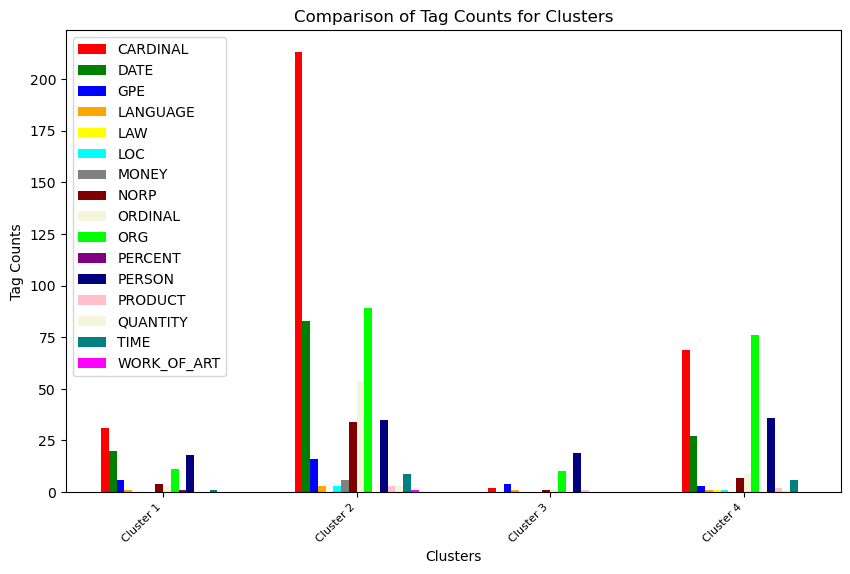

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Tag counts for each cluster
tag_counts = {
    'Cluster 1': dict_c0,
    'Cluster 2': dict_c1,
    'Cluster 3': dict_c2,
    'Cluster 4': dict_c3
}

# Get all unique tags
tags = sorted(set(tag for cluster_tags in tag_counts.values() for tag in cluster_tags.keys()))

# Get the count for each tag in each cluster
counts = [[tag_counts[cluster].get(tag, 0) for tag in tags] for cluster in clusters]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the spacing between clusters
bar_width = 0.04
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'cyan', 'gray','maroon',
          'Beige', 'lime', 'purple', 'Navy','Pink', 'Beige', 'Teal', 'Magenta'] 

# Set the positions of the bars on the x-axis
x = np.arange(len(clusters))

# Plot the bars for each tag
for i, tag in enumerate(tags):
    plt.bar(x + i * (bar_width), [count[i] for count in counts], width=bar_width, label=tag, color=colors[i % len(colors)])

# Set the x-axis labels and title
plt.xlabel('Clusters')
plt.ylabel('Tag Counts')
plt.title('Comparison of Tag Counts for Clusters')

# Set the x-axis tick positions and labels with increased boundaries
plt.xticks(x + ((len(tags) - 1) * bar_width) / 2, clusters, fontsize=8, rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()

***Named Entity Recognition using NLTK***

In [14]:
! pip install nltk

In [15]:
import nltk
from nltk import word_tokenize, pos_tag

nltk.download('words')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
text='cannot help thinking chatgpt writing entire thread real time fookin real anymore unreal'
for sent in nltk.sent_tokenize(text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            print(chunk.label())


[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
entities_dict1 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict1:
                    entities_dict1[chunk.label()] = entities_dict1[chunk.label()] +1
                else:
                    entities_dict1[chunk.label()] = 1

print(entities_dict1)

{'ORGANIZATION': 1}


In [17]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
entities_dict2 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict2:
                    entities_dict2[chunk.label()] = entities_dict2[chunk.label()] +1
                else:
                    entities_dict2[chunk.label()] = 1

print(entities_dict2)

{}


In [18]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
entities_dict3 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict3:
                    entities_dict3[chunk.label()] = entities_dict3[chunk.label()] +1
                else:
                    entities_dict3[chunk.label()] = 1

print(entities_dict3)

{}


In [19]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
entities_dict0 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict0:
                    entities_dict0[chunk.label()] = entities_dict0[chunk.label()] +1
                else:
                    entities_dict0[chunk.label()] = 1

print(entities_dict0)

{}


***Named Entity Recognition using flair***

In [20]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 39.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=5e5e02965e49fc9baf762debf23c0a7500d9c735f961aa5c82faf6c13cc6e2dc
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
  Created wheel for pptree: filename=pptree-3.1-py3-none-any.whl size=4629 sha256=fe9c29dde59bcb4e5bc83dc08ae18d67e6beddb4d7e8f9c7e7b7ca57648c1004
  Stored in directory: /root/.cache/pip/wheels/9f/b6/0e/6f26eb9e6eb53ff2107a7888d72b5a6a597593956113037828
  Created wheel for sqlitedict: filename=sqlitedict-2.1.0-py3-none-any.whl size=16868 sha256=74

In [21]:
# using flair

from flair.data import Sentence
from flair.models import SequenceTagger
from segtok.segmenter import split_single
tagger = SequenceTagger.load('ner-ontonotes')


2024-01-19 08:27:29,079 SequenceTagger predicts: Dictionary with 75 tags: O, S-PERSON, B-PERSON, E-PERSON, I-PERSON, S-GPE, B-GPE, E-GPE, I-GPE, S-ORG, B-ORG, E-ORG, I-ORG, S-DATE, B-DATE, E-DATE, I-DATE, S-CARDINAL, B-CARDINAL, E-CARDINAL, I-CARDINAL, S-NORP, B-NORP, E-NORP, I-NORP, S-MONEY, B-MONEY, E-MONEY, I-MONEY, S-PERCENT, B-PERCENT, E-PERCENT, I-PERCENT, S-ORDINAL, B-ORDINAL, E-ORDINAL, I-ORDINAL, S-LOC, B-LOC, E-LOC, I-LOC, S-TIME, B-TIME, E-TIME, I-TIME, S-WORK_OF_ART, B-WORK_OF_ART, E-WORK_OF_ART, I-WORK_OF_ART, S-FAC


In [22]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
entities_dict0 = {}
for comment in comments:
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            if entity.tag in entities_dict0:
                entities_dict0[entity.tag] = entities_dict0[entity.tag] +1
            else:
                entities_dict0[entity.tag] = 1
print(entities_dict0)


{'DATE': 9, 'NORP': 1, 'ORDINAL': 3, 'CARDINAL': 19, 'PERSON': 4, 'GPE': 2, 'TIME': 1, 'QUANTITY': 1, 'MONEY': 1}


In [23]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
entities_dict1 = {}
i=0
for comment in comments:
    print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict1:
                entities_dict1[entity.tag] = entities_dict1[entity.tag] +1
            else:
                entities_dict1[entity.tag] = 1
print(entities_dict1)


0
1
CARDINAL
2
3
4
5
6
PERSON
PERSON
7
8
DATE
9
CARDINAL
CARDINAL
10
11
ORDINAL
12
13
14
15
16
17
CARDINAL
18
19
20
21
DATE
22
23
CARDINAL
NORP
CARDINAL
CARDINAL
CARDINAL
CARDINAL
24
ORDINAL
25
CARDINAL
TIME
26
27
28
CARDINAL
29
30
31
PERSON
32
33
CARDINAL
CARDINAL
34
35
36
37
38
CARDINAL
39
CARDINAL
CARDINAL
QUANTITY
CARDINAL
CARDINAL
CARDINAL
CARDINAL
40
41
CARDINAL
42
43
44
45
46
47
TIME
48
49
CARDINAL
CARDINAL
50
CARDINAL
51
52
DATE
53
QUANTITY
54
55
56
57
58
DATE
59
60
CARDINAL
61
CARDINAL
PERSON
PERSON
PERSON
62
CARDINAL
63
ORG
64
DATE
65
66
FAC
MONEY
MONEY
DATE
MONEY
67
68
DATE
TIME
CARDINAL
69
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
70
DATE
QUANTITY
QUANTITY
QUANTITY
QUANTITY
71
72
73
NORP
74
CARDINAL
CARDINAL
75
76
77
CARDINAL
78
DATE
79
80
81
82
83
CARDINAL
DATE
DATE
84
85
86
87
DATE
88
CARDINAL
89
90
TIME
91
CARDINAL
DATE
92
QUANTITY
QUANTITY
QUANTITY
93
CARDINAL
94
CARDINAL
CARDINAL
ORDINAL
95
96
ORDINAL
97
CARDINAL
CARDINAL
98
99
100
101
102
103
104
105
106
CARDINAL
1

In [24]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
entities_dict2 = {}
i=0
for comment in comments:
    #print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict2:
                entities_dict2[entity.tag] = entities_dict2[entity.tag] +1
            else:
                entities_dict2[entity.tag] = 1
print(entities_dict2)


DATE
GPE
ORDINAL
DATE
CARDINAL
CARDINAL
PERSON
GPE
PERSON
CARDINAL
NORP
CARDINAL
PERSON
{'DATE': 2, 'GPE': 2, 'ORDINAL': 1, 'CARDINAL': 4, 'PERSON': 3, 'NORP': 1}


In [25]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
entities_dict3 = {}
i=0
for comment in comments:
    #print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict3:
                entities_dict3[entity.tag] = entities_dict3[entity.tag] +1
            else:
                entities_dict3[entity.tag] = 1
print(entities_dict3)


PERSON
ORDINAL
CARDINAL
PERSON
CARDINAL
CARDINAL
DATE
NORP
ORDINAL
CARDINAL
CARDINAL
CARDINAL
DATE
CARDINAL
CARDINAL
CARDINAL
MONEY
DATE
CARDINAL
CARDINAL
CARDINAL
CARDINAL
DATE
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
DATE
CARDINAL
ORDINAL
DATE
CARDINAL
CARDINAL
CARDINAL
CARDINAL
QUANTITY
CARDINAL
CARDINAL
ORDINAL
CARDINAL
DATE
CARDINAL
CARDINAL
MONEY
CARDINAL
CARDINAL
DATE
CARDINAL
NORP
NORP
GPE
CARDINAL
CARDINAL
DATE
DATE
CARDINAL
CARDINAL
CARDINAL
PERSON
DATE
CARDINAL
CARDINAL
NORP
CARDINAL
CARDINAL
ORG
DATE
CARDINAL
DATE
CARDINAL
DATE
TIME
CARDINAL
PERSON
TIME
ORG
DATE
CARDINAL
CARDINAL
CARDINAL
CARDINAL
QUANTITY
QUANTITY
QUANTITY
DATE
CARDINAL
CARDINAL
ORDINAL
ORDINAL
CARDINAL
ORDINAL
CARDINAL
{'PERSON': 4, 'ORDINAL': 7, 'CARDINAL': 52, 'DATE': 16, 'NORP': 4, 'MONEY': 2, 'QUANTITY': 4, 'GPE': 1, 'ORG': 2, 'TIME': 2}


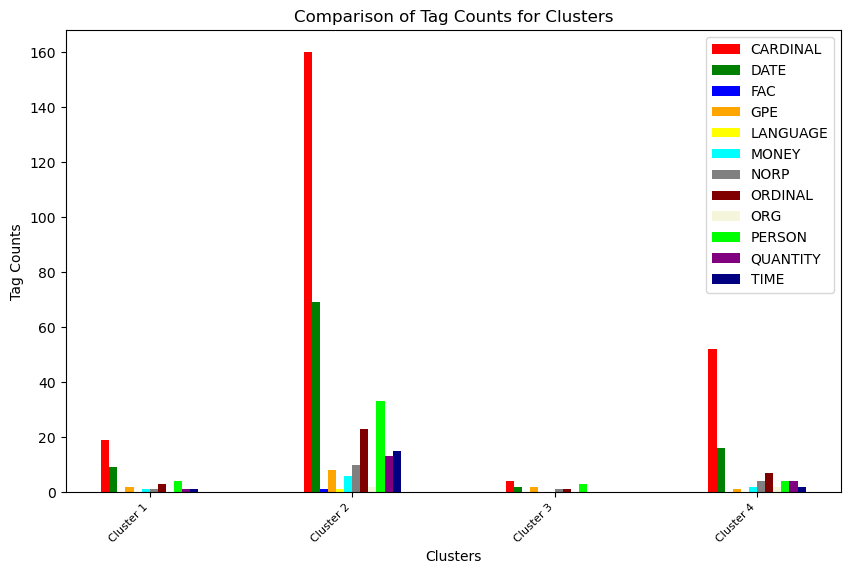

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Tag counts for each cluster
tag_counts = {
    'Cluster 1': entities_dict0,
    'Cluster 2': entities_dict1,
    'Cluster 3': entities_dict2,
    'Cluster 4': entities_dict3
}

# Get all unique tags
tags = sorted(set(tag for cluster_tags in tag_counts.values() for tag in cluster_tags.keys()))

# Get the count for each tag in each cluster
counts = [[tag_counts[cluster].get(tag, 0) for tag in tags] for cluster in clusters]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the spacing between clusters
bar_width = 0.04
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'cyan', 'gray','maroon',
          'Beige', 'lime', 'purple', 'Navy','Pink', 'Beige', 'Teal', 'Magenta'] 

# Set the positions of the bars on the x-axis
x = np.arange(len(clusters))

# Plot the bars for each tag
for i, tag in enumerate(tags):
    plt.bar(x + i * (bar_width), [count[i] for count in counts], width=bar_width, label=tag, color=colors[i % len(colors)])

# Set the x-axis labels and title
plt.xlabel('Clusters')
plt.ylabel('Tag Counts')
plt.title('Comparison of Tag Counts for Clusters')

# Set the x-axis tick positions and labels with increased boundaries
plt.xticks(x + ((len(tags) - 1) * bar_width) / 2, clusters, fontsize=8, rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()